# Homework 3: Arrays,  File I/O and Plotting

Please complete this homework assignment in code cells in the iPython notebook. Include comments in your code when necessary.  Please rename the notebook as SIS ID_HW03.ipynb (your student ID number) and save the notebook once you have executed it as a PDF  (note, that when saving as PDF you don't want to use the option with latex because it crashes, but rather the one to save it directly as a PDF). 

**The homework should be submitted on bCourses under the Assignments tab (both the .ipynb and .pdf files). Please label it by your student ID number (SIS ID)**

## Problem 1: Sunspots

[Adapted from Newman, Exercise 3.1] At <a href="http://www-personal.umich.edu/~mejn/computational-physics/sunspots.txt">this link</a> (and also in the current directory on datahub) you will find a file called `sunspots.txt`, which contains the observed number of sunspots on the Sun for each month since January 1749. The file contains two columns of numbers, the first being the month and the second being the sunspot number.

a. Write a program that reads in the data and makes a graph of sunspots as a function of time. Adjust the $x$ axis so that the data fills the whole horizontal width of the graph.

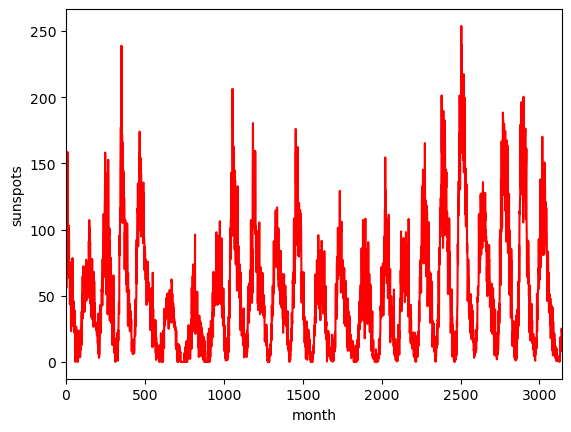

In [11]:
f = open('sunspots.txt', 'r')
month = []
sunspots = []
for line in f:
    table = line.split()
    month.append(int(table[0]))
    sunspots.append(float(table[1]))
f.close()

import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(month, sunspots, 'r-' )
plt.xlim(0, 3142)
plt.xlabel('month')
plt.ylabel('sunspots')
plt.show()

b. Modify your code to display two subplots in a single figure: The plot from Part 1 with all the data, and a second subplot with the first 1000 data points on the graph.

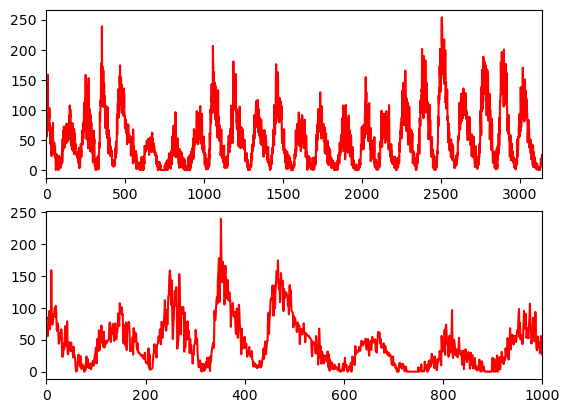

In [12]:
plt.figure(1) #빈 figure 생성
plt.subplot(211)    # 2 Rows, 1 Column; Plot #1
plt.plot(month, sunspots, 'r')
plt.xlim(0, 3142)

plt.subplot(212)    # 2 Rows, 1 Column; Plot #2
plt.plot(month[:1000], sunspots[:1000], 'r')
plt.xlim(0, 1000)
plt.show()

c. Write a function `running_average(y, r)` that takes an array or list $y$ and calculates the running average of the data, defined by 
$$ Y_k = \frac{1}{2r+1} \sum_{m=-r}^r y_{k+m},$$
where $y_k$ are the sunspot numbers in our case. Use this function and modify your second subplot (the one with the first 1000 data points) to plot both the original data and the running average on the same graph, again over the range covered by the first 1000 data points. Use $r=5$, but make sure your program allows the user to easily change $r$.

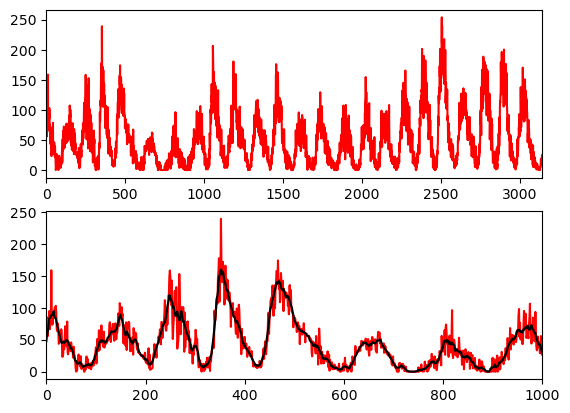

In [13]:
def running_average(y, r):
    sigma = sum([y[k + i] for i in range(-r, r + 1, 1)])
    return (1 / (2*r + 1)) * sigma

average = []
r = 5
for k in month[:1000]:
    average.append(running_average(sunspots, r))

plt.figure(1) #빈 figure 생성
plt.subplot(211)    # 2 Rows, 1 Column; Plot #1
plt.plot(month, sunspots, 'r')
plt.xlim(0, 3142)

plt.subplot(212)    # 2 Rows, 1 Column; Plot #2
plt.plot(month[:1000], sunspots[:1000], 'r')
plt.plot(month[:1000], average, 'black')
plt.xlim(0, 1000)
plt.show()

The next two parts may require you to google for how to do things. Make a strong effort to do these parts on your own without asking for help. If you do ask for help from a GSI or friend, first ask them to point you to the resource they used, and do your best to learn the necessary techniques from that resource yourself. Finding and learning from online documentation and forums is a very important skill. (Hint: Stack Exchange/Stack Overflow is often a great resource.)

d. Add legends to each of your subplots, but make them partially transparent, so that you can still see any data that they might overlap. *Note: In your program, you should only have to change $r$ for the running average in one place to adjust both the graph and the legend.*

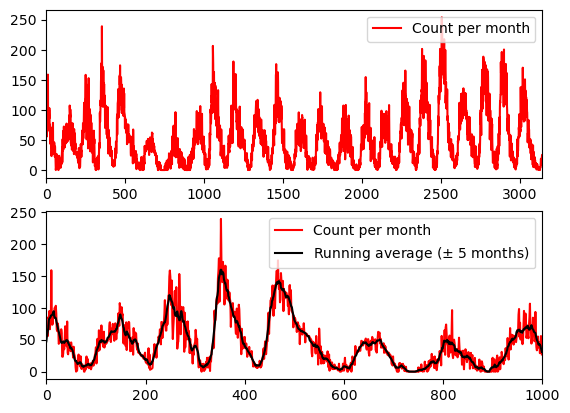

In [14]:
plt.figure(1) #빈 figure 생성
plt.subplot(211)    # 2 Rows, 1 Column; Plot #1
plt.plot(month, sunspots, 'r', label='Count per month')
plt.xlim(0, 3142)
plt.legend(loc='upper right')

plt.subplot(212)    # 2 Rows, 1 Column; Plot #2
plt.plot(month[:1000], sunspots[:1000], 'r')
label_name = 'Running average ($\pm$ ' + str(r) + ' months)'
plt.plot(month[:1000], average, 'black', label=label_name)
plt.xlim(0, 1000)
plt.legend(['Count per month', label_name], loc='upper right')
plt.show()

e. Since the $x$ and $y$ axes in both subplots have the same units, add shared $x$ and $y$ labels to your plot that are centered on the horizontal and vertical dimensions of your figure, respectively. Also add a single title to your figure.

When your are finished, your plot should look something close to this:

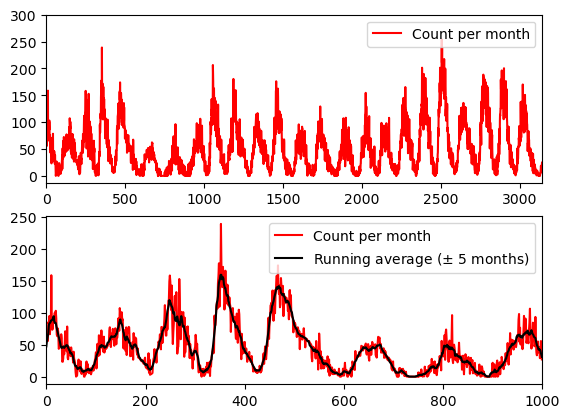

In [15]:
import numpy as np

plt.figure(1) #빈 figure 생성
plt.subplot(211)    # 2 Rows, 1 Column; Plot #1
plt.plot(month, sunspots, 'r', label='Count per month')
plt.xlim(0, 3142)
plt.yticks(np.arange(0, 301, 50))
plt.legend(loc='upper right')

plt.subplot(212)    # 2 Rows, 1 Column; Plot #2
plt.plot(month[:1000], sunspots[:1000], 'r')
label_name = 'Running average ($\pm$ ' + str(r) + ' months)'
plt.plot(month[:1000], average, 'black', label=label_name)
plt.xlim(0, 1000)
plt.legend(['Count per month', label_name], loc='upper right')
plt.show()

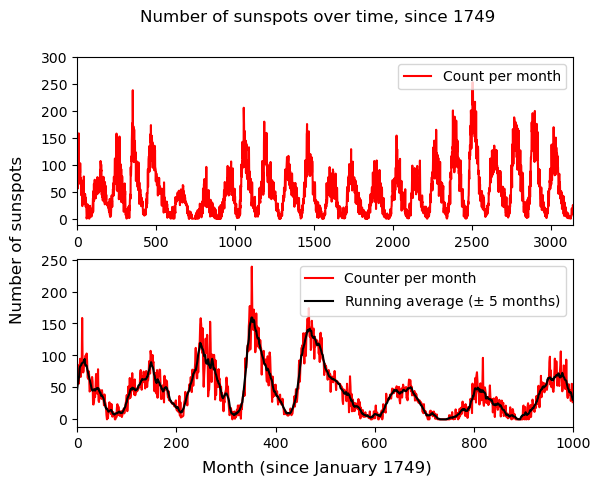

In [16]:
fig, ax = plt.subplots(2)
#fig = plt.figure()

#ax[0] = fig.add_subplot(211)
ax[0].set_xlim(0, 3142)
ax[0].plot(month, sunspots, 'r', label='Count per month')
ax[0].set_yticks(np.arange(0, 301, 50))
ax[0].legend(loc='upper right')

#ax[1] = fig.add_subplot(212)
new_x = month[:1000]
new_y = sunspots[:1000]
ax[1].set_xlim(0, 1000)
ax[1].plot(new_x, new_y, 'r')
label_name = 'Running average ($\pm$ ' + str(r) + ' months)'
ax[1].plot(new_x, average, 'black', label=label_name)
ax[1].legend(['Counter per month', label_name], loc='upper right')

fig.suptitle('Number of sunspots over time, since 1749')
fig.supxlabel('Month (since January 1749)')
fig.supylabel('Number of sunspots')

plt.show()

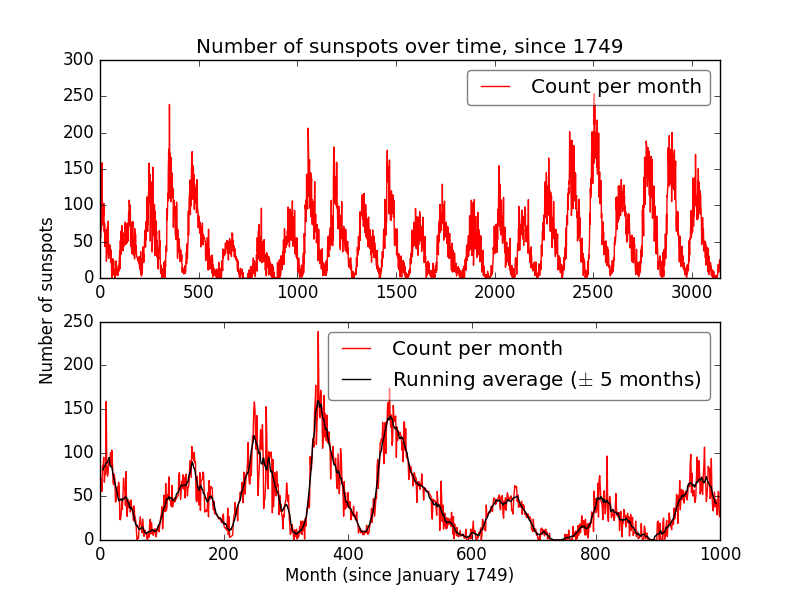

In [8]:
# Don't rerun this snippet of code.
# If you accidentally do, uncomment the lines below and rerun

from IPython.display import Image
Image(filename="img/p1_output.png")

#### Hints

* The running average is not defined for the first and last few points that you're taking a running average over. (Why is that?) Notice, for instance, that the black curve in the plot above doesn't extend quite as far on either side as the red curve. For making your plot, it might be helpful if your `running_average` function returns an array of the $x$-values $x_k$ (or their corresponding indices $k$) along with an array of the $y$-values $Y_k$ that you compute for the running average.

* You can use the Latex code `$\pm$` for the $\pm$ symbol in the legend. You can also just write `+/-` if you prefer.


## Problem 2: Variety Plot

In this problem, you will reproduce the following as a single figure with four subplots, as best you can:

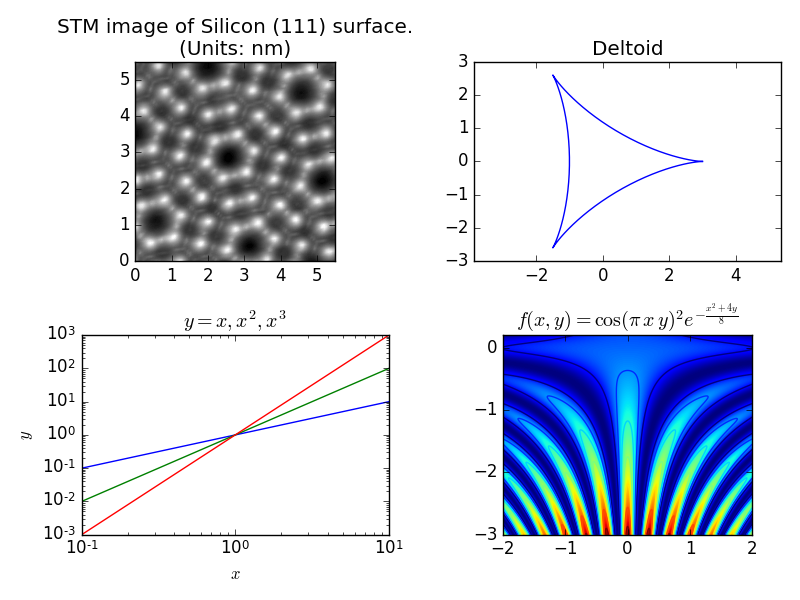

In [4]:
# Don't rerun this snippet of code.
# If you accidentally do, uncomment the lines below and rerun

#from IPython.display import Image
#Image(filename="img/p2_output.png")

Here are some hints and directions for each one:

**Upper-left:** This is an image of silicon taken with an electron microscope.

You can find the data file `stm.txt` [here](http://www-personal.umich.edu/~mejn/computational-physics/stm.txt) and in your datahub directory, among resources for the [Newman](http://www-personal.umich.edu/~mejn/computational-physics/) text.

You may assume that the upper-left of the array is indeed the upper-left of the image.

Both axes should run from 0 to 5.5.

This subplot uses the `gray` colormap.

**Upper-Right:** Matplotlib can plot any list of $(x,y)$ points you give it, including parametric or polar curves. The curve in this subplot is called a "deltoid", and is the result of the equations

$$ \begin{align*}
x &= 2\cos\theta + \cos2\theta \\
y &= 2\sin\theta - \sin2\theta
\end{align*} $$

over a range of $\theta$ from $0$ to $2\pi$.

To get the aspect ratio equal with nice spacing around the curve, try one of the following, depending on how you are making your subplots:
- if you're using `plt.subplot(...)` to get each subplot (the "state-machine" approach), add the `aspect='equal'` and `adjustable='datalim'` arguments to the deltoid subplot, so your command will look something like `plt.subplot(..., aspect='equal', adjustable='datalim')`.
- if you're using `... = plt.subplots(...)` (note the 's'!) or `ax = fig.add_subplot(...)` on a figure `fig` to get subplots with axes objects (the "object-oriented" approach), add the line `ax.set_aspect(aspect='equal', adjustable='datalim')`, where `ax` is the axes object you want to affect.

**Lower-Left:** This kind of plot is called a log-log plot, where both axes are on a logarithmic scale. Google or look in the matplotlib gallery to learn how to make this kind of plot.

The three curves are $y = x$, $y = x^2$, and $y = x^3$, where $x$ ranges over $10^{-1}$ to $10^1$. (Note: You can write powers of ten in python using the shorthand `1e-1` for $10^{-1}$, `1e1` for $10^1$, and so on.)

To make the pretty mathematical labels you see in the sample figure above, you can use
* `r'$y = x, x^2, x^3$'` for the title
* `r'$x$'` for the $x$-axis, and
* `r'$y$'` for the $y$-axis.

Just put these bits of code as you see them (with the **`r`** outside the quotes!) where you would normally put a string for the title or axes labels.

**Lower-Right:** Here you see a density plot with contours of the function

$$f(x,y) = \cos^2(\pi\,x\,y ) e^{-\frac{x^2 + 4 y}{8}},$$

over $x$ from -2 to 2 and $y$ from -3 to 0.2.

Use `meshgrid` to generate the $x$ and $y$ values. Be careful to make sure that the point $(-2,-3)$ is in the bottom left corner of the plot.

You'll need to use both `imshow` and `contour` to generate the density plot and then overlay it with contours. This plot uses the default contour spacing, so you don't need to worry about adjusting that. The colormap is `jet`, matplotlib's current default. (The default colormap will be changing to `viridis` in the next version.)

To get the ticks spaced out like you see here, use matplotlib's `xticks` or `set_xticks` functions for the $x$-axis (depending on how you're making your plots), and similar functions for the $y$-axis. You can pass each of these a single argument: a simple list or array of the numbers you want ticked on each axis.

**Spacing the subplots:** Once all is said and done and you run `plt.show()`, you may notice your plots are cramped and overlapping each other. Add the line `plt.tight_layout()` before `plt.show()`, and matplotlib will space things out in an attempt to avoid overlapping subplots.

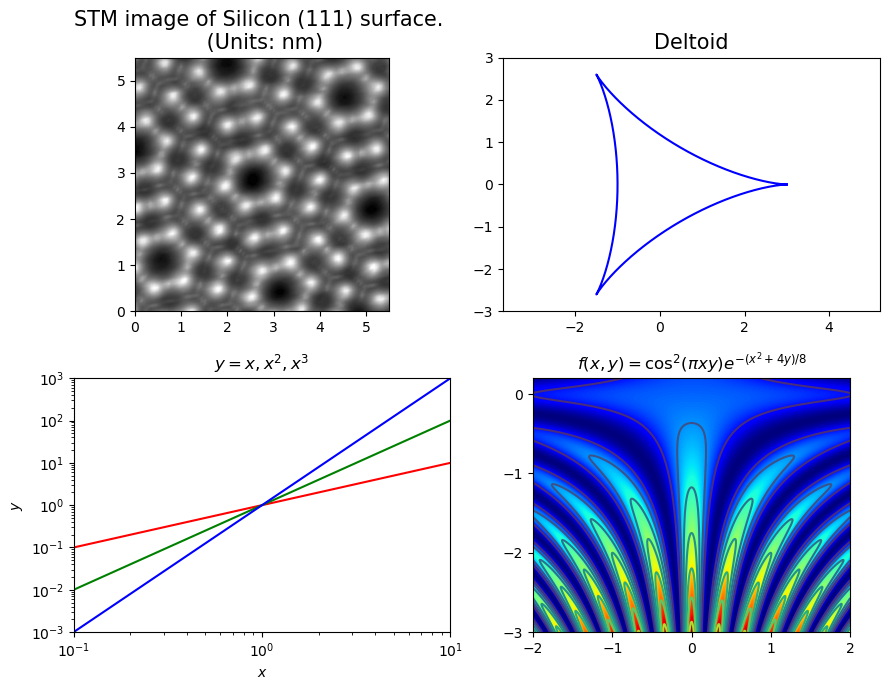

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

# Upper-left data
data = np.loadtxt('/home/jovyan/Physics-88-SP23/Week06/HW03/stm.txt')

lst = []
for line in data:
    lst.append([float(i) for i in line])
    
fig, ax = plt.subplots(2, 2, figsize=(9, 7))
# Upper-left subplot
ax[0, 0].set_title('STM image of Silicon (111) surface. \n (Units: nm)', fontsize=15)
ax[0, 0].imshow(data, cmap='gray', extent=[0, 5.5, 0, 5.5])
#ax[0, 0].set_xticks(range(6))
ax[0, 0].set_aspect(aspect='equal')
fig.subplots_adjust(hspace=0.4, wspace=0.4)

# Upper-right data
theta = np.arange(0, 2*np.pi, 0.001)
x = 2*np.cos(theta) + np.cos(2*theta)
y = 2*np.sin(theta) - np.sin(2*theta)
# Upper-right subplot
ax[0, 1].set_title('Deltoid', fontsize=15)
ax[0, 1].set_aspect(aspect='equal', adjustable='datalim')
ax[0, 1].set_ylim([-3, 3])
ax[0, 1].set_yticks([-3, -2, -1, 0, 1, 2, 3])
ax[0, 1].set_xticks([-2, 0, 2, 4])
ax[0, 1].plot(x, y, 'b')

# Lower-left data
x = np.linspace(1e-1, 1e1, 1000)

# Lower-left subplot
ax[1, 0].set_title(r'$y = x, x^2, x^3$')
ax[1, 0].set_xlabel(r'$x$')
ax[1, 0].set_ylabel(r'$y$')
ax[1, 0].loglog(x, x, 'r')
ax[1, 0].loglog(x, x**2, 'g')
ax[1, 0].loglog(x, x**3, 'b')
ax[1, 0].set_xscale('log')
ax[1, 0].set_yscale('log')
ax[1, 0].set_xlim(1e-1, 1e1)
ax[1, 0].set_ylim(1e-3, 1e3)

# Lower-right data
x, y = np.meshgrid(np.arange(-2, 2, 0.001), np.arange(0.2, -3, -0.001))
f = (np.cos(np.pi * x * y)**2 * np.exp(-(x**2 + 4*y)/(8)))
# Lower-right subplot
ax[1, 1].set_title(r'$f(x,y) = \cos^2(\pi xy) e^{-(x^2 + 4y)/8}$')
ax[1, 1].contour(x, y, f)
ax[1, 1].imshow(f, cmap='jet', extent=[-2, 2, -3, 0.2])
ax[1, 1].set_xticks([-2, -1, 0, 1, 2])
ax[1, 1].set_yticks([-3, -2, -1, 0])

fig.tight_layout()
fig.show()